# 1. Import Python Library and Load Data Files
In this section, we import the required library for our code and load CSV data files

In [1]:
import pandas as pd
import numpy as np

# Reading two CSV files, weather_data and price_demand_data, using pandas
weather_data = pd.read_csv("weather_data.csv", skipinitialspace=True)
price_demand_data = pd.read_csv("price_demand_data.csv")

# Printing the shape of dataframes and count of null values for both dataframes
print("Weather Data shape:", weather_data.shape)
print("Price Demand Data shape:", price_demand_data.shape)
print("Missing values in Weather Data:\n", weather_data.isnull().sum())
print("Missing values in Price Demand Data:\n", price_demand_data.isnull().sum())

# Printing the data types of columns for both dataframes
print("Data types of Weather Data:\n", weather_data.dtypes)
print("Data types of Price Demand Data:\n", price_demand_data.dtypes)

# Creating copies of the original dataframes to keep the original data intact
wd = weather_data.copy()
pdd = price_demand_data.copy()

# Setting option to display all rows
pd.set_option('display.max_rows', None)

# Displaying the first five rows of both dataframes
display(wd.head())
display(pdd.head())

Weather Data shape: (243, 21)
Price Demand Data shape: (11664, 4)
Missing values in Weather Data:
 Date                                  0
Minimum temperature (°C)              1
Maximum temperature (°C)              1
Rainfall (mm)                         2
Evaporation (mm)                      0
Sunshine (hours)                      0
Direction of maximum wind gust        3
Speed of maximum wind gust (km/h)     3
Time of maximum wind gust             3
9am Temperature (°C)                  1
9am relative humidity (%)             1
9am cloud amount (oktas)              0
9am wind direction                   15
9am wind speed (km/h)                 1
9am MSL pressure (hPa)                2
3pm Temperature (°C)                  0
3pm relative humidity (%)             0
3pm cloud amount (oktas)              1
3pm wind direction                    5
3pm wind speed (km/h)                 0
3pm MSL pressure (hPa)                1
dtype: int64
Missing values in Price Demand Data:
 REGION    

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


# 2. Data Cleaning
In this session, we clean up both pdd and wd DataFrames and merge them into a new DataFrame for model building

2.1 Clean up and prepare pdd DataFrame

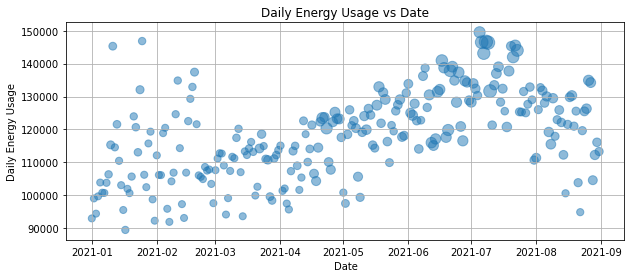

                DAILY ENERGY USAGE  ENERGY PRICE  9am PRICING  3pm PRICING  \
SETTLEMENTDATE                                                               
2021-01-01               92926.685      1.000000            1            1   
2021-01-02               98995.065      1.000000            1            1   
2021-01-03               94371.480      1.000000            1            1   
2021-01-04               99640.535      1.000000            1            1   
2021-01-05              103840.455      1.000000            1            1   
2021-01-06              100748.620      1.000000            1            1   
2021-01-07              100672.950      1.000000            1            1   
2021-01-08              103763.200      1.041667            1            1   
2021-01-09              106315.210      1.125000            1            1   
2021-01-10              115294.305      1.291667            1            1   
2021-01-11              145310.190      1.229167            1   

In [2]:
import matplotlib.pyplot as plt

# Convert 'SETTLEMENTDATE' column to datetime format
pdd['SETTLEMENTDATE'] = pd.to_datetime(pdd['SETTLEMENTDATE'], format='%d/%m/%Y %H:%M')

# Add a new column 'ENERGY USAGE' to pdd DataFrame by converting 'TOTALDEMAND' to energy usage based on 30 minutes interval
pdd['ENERGY USAGE'] = pdd['TOTALDEMAND']*0.5

# Define a function to convert 'PRICECATEGORY' values to integer
def energy_price(pricecategory):
    """
    Convert 'PRICECATEGORY' values to integer
    """
    category = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'EXTREME': 4}
    return category.get(pricecategory, None)

# Add a new column 'ENERGY PRICE' to pdd DataFrame containing integer values of 'PRICECATEGORY'
pdd['ENERGY PRICE'] = pdd.iloc[:,3].apply(energy_price)

# Drop non-required columns and the last row of data which contains 1/9/2021 data only
pdd_clean = pdd[:-1].drop(columns = ['REGION', 'TOTALDEMAND','PRICECATEGORY'])

# Group the data by date and calculate the daily energy use and average energy pricing
grouped_pdd = pdd_clean.groupby(pdd_clean['SETTLEMENTDATE'].dt.date).agg({'ENERGY USAGE': 'sum','ENERGY PRICE': 'mean'}).rename(columns={'ENERGY USAGE': 'DAILY ENERGY USAGE'}).reset_index()

# Extract 9am and 3pm 'PRICECATEGORY' values from pdd_clean dataset
grouped_pdd['9am PRICING'] = pdd.loc[(pdd['SETTLEMENTDATE'].dt.hour == 9) & (pdd['SETTLEMENTDATE'].dt.minute == 0), ['ENERGY PRICE']].reset_index(drop=True)
grouped_pdd['3pm PRICING'] = pdd.loc[(pdd['SETTLEMENTDATE'].dt.hour == 15) & (pdd['SETTLEMENTDATE'].dt.minute == 0), ['ENERGY PRICE']].reset_index(drop=True)

# Feature Engineering: add a variable to identify if a date is weekday or weekend
grouped_pdd['SETTLEMENTDATE'] = pd.to_datetime(grouped_pdd['SETTLEMENTDATE'])
weekday = grouped_pdd['SETTLEMENTDATE'].dt.weekday
grouped_pdd['WEEKEND'] = [0 if x < 5 else 1 for x in weekday]

# Create a scatter plot of daily energy usage vs date
# The size of each point is proportional to the energy pricing multiplied by 50
plt.figure(figsize=(10, 4))
plt.scatter(grouped_pdd['SETTLEMENTDATE'], grouped_pdd['DAILY ENERGY USAGE'], 
            s = grouped_pdd['ENERGY PRICE']*50, alpha = 0.5)
plt.xlabel('Date')
plt.ylabel('Daily Energy Usage')
plt.title('Daily Energy Usage vs Date')
plt.grid(True)
plt.show()

# Reset the index
new_ppd = grouped_pdd.set_index('SETTLEMENTDATE')

# Display the new DataFrame
print(new_ppd)

2.2 Clean up and prepare wd DataFrame

In [3]:
# Perform linear interpolation to fill missing values, then forward fill remaining missing values
wd.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
wd.ffill(inplace=True)

# Convert wind direction strings to integers using predefined bins
wd.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
           [1,2,3,4,5,6,7,8,-1,-2,-3,-4,-5,-6,-7,-8], inplace=True)

# Convert 'Calm' wind speed values to 0
wd.replace(to_replace='Calm', value=0, inplace=True)

# Convert 'Date' column to datetime format and '9am wind speed (km/h)' and '3pm wind speed (km/h)' columns to integers
wd['Date'] = pd.to_datetime(wd['Date'], format = '%d/%m/%Y')
wd['9am wind speed (km/h)'] = wd['9am wind speed (km/h)'].astype(int)
wd['3pm wind speed (km/h)'] = wd['3pm wind speed (km/h)'].astype(int)

# Set 'Date' column as the index for the DataFrame
new_wd = wd.set_index('Date')

# Display the new DataFrame
display(new_wd.head())

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,2,31.0,13:14,19.2,77.0,6,1,2,1018.8,28.1,43,5.0,5,13,1015.3
2021-01-02,18.4,29.0,0.0,9.4,1.3,-8,30.0,8:22,23.3,52.0,7,-8,17,1013.3,28.7,38,7.0,-3,4,1008.5
2021-01-03,17.0,26.2,12.6,4.8,7.1,-4,33.0,17:55,18.3,100.0,8,-4,4,1007.7,23.5,59,4.0,-2,2,1005.2
2021-01-04,16.0,18.6,2.6,3.8,0.0,8,41.0,16:03,16.2,98.0,8,8,11,1010.0,18.2,82,8.0,-2,17,1011.0
2021-01-05,15.9,19.1,11.2,1.0,0.0,8,35.0,11:02,17.2,96.0,8,8,13,1012.5,18.2,82,8.0,8,19,1013.3


2.3 Merge two data sets on date column and check data

In [4]:
# Join the two DataFrames on the 'Date' column and store the result in a new variable
data = new_wd.join(new_ppd)

# Display the first few rows of the new DataFrame
display(data.head())

# Print the number of missing values in each column of the DataFrame
print(data.isnull().sum())

# Print the data types of each column in the DataFrame
print(data.dtypes)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),DAILY ENERGY USAGE,ENERGY PRICE,9am PRICING,3pm PRICING,WEEKEND
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,2,31.0,13:14,19.2,77.0,...,43,5.0,5,13,1015.3,92926.685,1.0,1,1,0
2021-01-02,18.4,29.0,0.0,9.4,1.3,-8,30.0,8:22,23.3,52.0,...,38,7.0,-3,4,1008.5,98995.065,1.0,1,1,1
2021-01-03,17.0,26.2,12.6,4.8,7.1,-4,33.0,17:55,18.3,100.0,...,59,4.0,-2,2,1005.2,94371.480,1.0,1,1,1
2021-01-04,16.0,18.6,2.6,3.8,0.0,8,41.0,16:03,16.2,98.0,...,82,8.0,-2,17,1011.0,99640.535,1.0,1,1,0
2021-01-05,15.9,19.1,11.2,1.0,0.0,8,35.0,11:02,17.2,96.0,...,82,8.0,8,19,1013.3,103840.455,1.0,1,1,0


Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
DAILY ENERGY USAGE                   0
ENERGY PRICE                         0
9am PRICING                          0
3pm PRICING                          0
WEEKEND                              0
dtype: int64
Minimum temp

# 3. Model Building and Evaluation
In this section, we build a model to predict the maximum daily energy usage based on the provided data.

3.1 Data Visualization

,DAILY ENERGY USAGE,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),ENERGY PRICE,WEEKEND
DAILY ENERGY USAGE,1.000000,-0.476039,-0.368928,-0.068327,-0.297746,-0.282551,-0.112961,0.032640,0.660928,-0.459932
Minimum temperature (°C),-0.476039,1.000000,0.709909,0.048969,0.656674,0.075525,0.059780,0.072676,-0.630623,-0.009003
Maximum temperature (°C),-0.368928,0.709909,1.000000,-0.120460,0.622718,0.463106,0.112211,-0.039392,-0.571918,0.031890
Rainfall (mm),-0.068327,0.048969,-0.120460,1.000000,-0.041847,-0.149117,-0.024533,0.049059,-0.011354,0.076658
Evaporation (mm),-0.297746,0.656674,0.622718,-0.041847,1.000000,0.273256,0.004478,0.170895,-0.542692,0.052662
Sunshine (hours),-0.282551,0.075525,0.463106,-0.149117,0.273256,1.000000,0.077655,-0.058937,-0.258127,0.081951
Direction of maximum wind gust,-0.112961,0.059780,0.112211,-0.024533,0.004478,0.077655,1.000000,-0.059243,-0.060393,-0.076857
Speed of maximum wind gust (km/h),0.032640,0.072676,-0.039392,0.049059,0.170895,-0.058937,-0.059243,1.000000,-0.321404,-0.072928
ENERGY PRICE,0.660928,-0.630623,-0.571918,-0.011354,-0.542692,-0.258127,-0.060393,-0.321404,1.000000,-0.105079
WEEKEND,-0.459932,-0.009003,0.031890,0.076658,0.052662,0.081951,-0.076857,-0.072928,-0.105079,1.000000


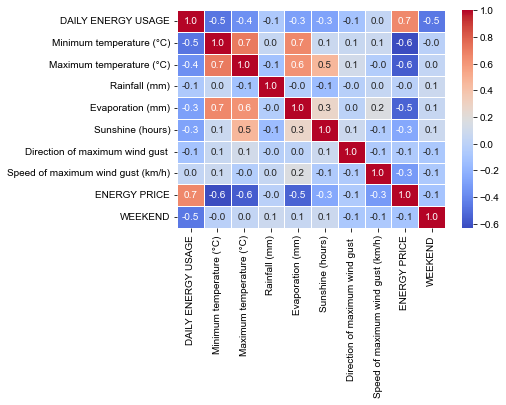

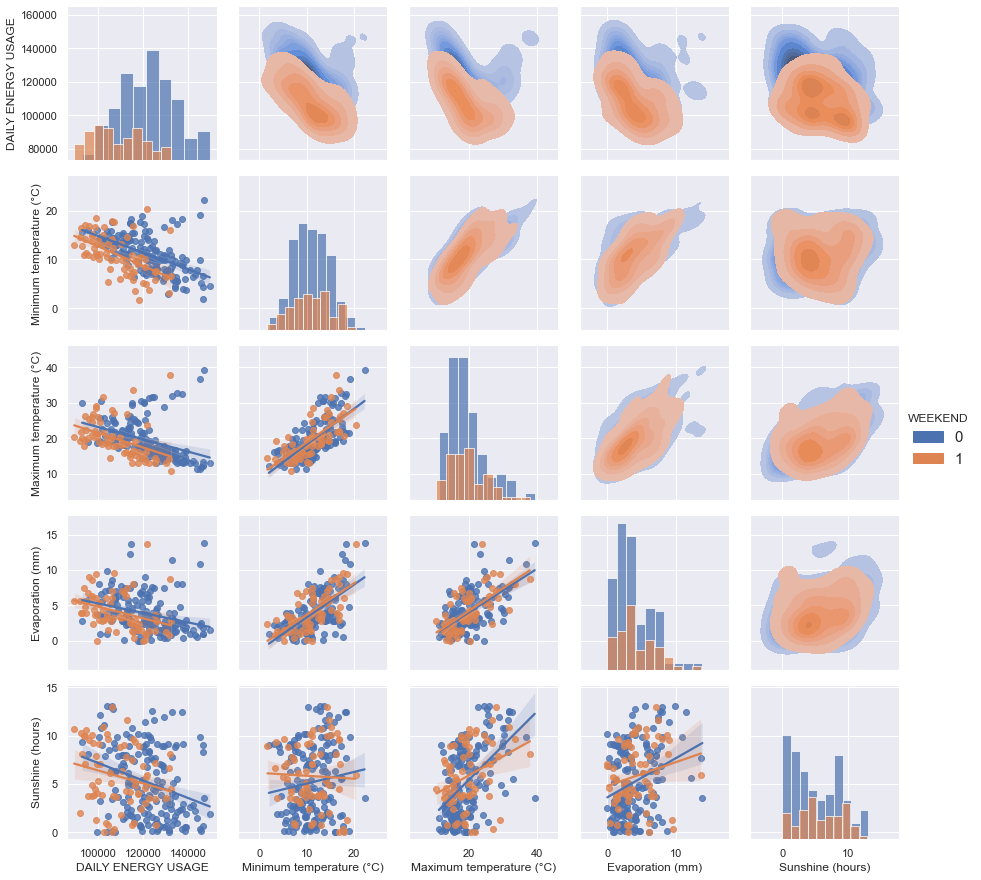

In [5]:
import seaborn as sns

def visualize_data(data):
    """Visualize the relationship between different features and the target variable (DAILY ENERGY USAGE) using scatter plots.
    
    Parameters:
        data (pandas DataFrame): The dataset containing the features and target.

    Returns:
        None

    """
    # Look at the data correlation
    corr_matrix = data[['DAILY ENERGY USAGE', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
                  'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
                  'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
                  'ENERGY PRICE', 'WEEKEND']].corr(method='pearson')
    display(corr_matrix)
    
    # Plot correlation analysis heatmap
    corr_heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidth=.5)

    # Plot the relationship between different features and the target variable (DAILY ENERGY USAGE)
    sns.set(color_codes=True)
    plt.rcParams["axes.labelsize"] = 12
    g = sns.PairGrid(data, vars = ['DAILY ENERGY USAGE', 'Minimum temperature (°C)', 
                                    'Maximum temperature (°C)', 'Evaporation (mm)', 'Sunshine (hours)'],
                                    hue = 'WEEKEND')
    g.map_lower(sns.regplot)
    g.map_diag(plt.hist, alpha=0.7)
    g.map_upper(sns.kdeplot, shade=True)
    g.add_legend(title='WEEKEND', fontsize=15)

# Call the function to visualize the DataFrame
visualize_data(data)

3.2 Model Building

In [6]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def build_model(X, Y, k):
    """
    Builds a linear regression model using k-fold cross-validation.
    
    Parameters:
        X (pandas.DataFrame): The feature matrix
        Y (pandas.Series): The target variable
        k (int): The number of folds for cross-validation.

    Returns:
        r2_scores (list): A list of R-squared scores for each fold.
        average_r2_score (float): The average R-squared score across all folds.
        average_rmse (float): The average root-mean-squared-error (RMSE) across all folds.
    """

    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    r2_scores = []
    rmse = []

    # Loop through each fold and train/test the model
    for train_index, test_index in kf.split(data):
        # Assign the training and testing data for the features in this particular fold
        X_train = X.iloc[train_index, :]
        X_test = X.iloc[test_index, :]

        # Assign the training and testing data for the target in this particular fold
        y_train = Y[train_index]
        y_test = Y[test_index]

        # Apply standard scaling to avoid any features with extremely high values to dominate
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Fit a linear regression model to the training data
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train, y_train)

        # Evaluate the model on the test data
        r2_scores.append(lm.score(X_test, y_test))
        rmse.append(mean_squared_error(y_test, lm.predict(X_test), squared=False))

        # Compute and print the average R-squared score and average RMSE
        average_r2_score = sum(r2_scores) / k
        average_rmse = sum(rmse) / k

    return r2_scores, average_r2_score, average_rmse

# Select the features, target and number of folds for cross-validation
X = data[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
              'Evaporation (mm)', 'Sunshine (hours)', 'Direction of maximum wind gust ',
              'Speed of maximum wind gust (km/h)', 'ENERGY PRICE', 'WEEKEND']]
Y = data['DAILY ENERGY USAGE']
k = 10

# Call the function to build a model and look at its performance
r2_scores, average_r2_score, average_rmse = build_model(X, Y, k)

# Print the performance metrics
print("Linear regression model R2 scores:\n", r2_scores)
print("Average linear regression model R2 scores:\n", average_r2_score)
print("Linear regression model RMSE:\n", average_rmse)

Linear regression model R2 scores:
 [0.786165691840488, 0.6610223307520501, 0.6891975598968119, 0.7551876539652649, 0.4963408787360968, 0.5566826312003983, 0.6581307091444735, 0.6670513240686073, 0.7821003703237043, 0.5155394700915119]
Average linear regression model R2 scores:
 0.6567418620019406
Linear regression model RMSE:
 7488.577266382063


# 4 Further Research
In this section, we further explore the dataset with nonlinear models and perform a short analysis on current weather and energy price data in Melbourne.

4.1 Explore effectiveness of non-linear models

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def explore_nonlinear_models(X, Y, k):
    """
    This function explores the performance of RandomForestRegressor and ExtraTreesRegressor
    models on a given dataset using k-fold cross-validation.

    Parameters:
    X (pandas.DataFrame): The feature matrix
    Y (pandas.Series): The target variable
    k (int): The number of folds for cross-validation

    Returns:
    (tuple): A tuple containing the following:
        - (float) The average R2 score of the RandomForestRegressor model
        - (float) The average root mean squared error (RMSE) of the RandomForestRegressor model
        - (float) The average R2 score of the ExtraTreesRegressor model
        - (float) The average root mean squared error (RMSE) of the ExtraTreesRegressor model
    """

    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    r2_scores_rfr=[]
    r2_scores_etr=[]
    rmse_rfr=[]
    rmse_etr=[]

    # Starting another loop here for our kfold
    for train_index, test_index in kf.split(data):
        
        # Assigning training and testing data for the features in this particular fold
        X_train = X.iloc[train_index, :]
        X_test = X.iloc[test_index, :]

        # Assigning training and testing data for the traget in this particular fold
        y_train = Y[train_index]
        y_test = Y[test_index]

        # Apply the scaler to avoid any features with extremely high values to dominate
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Complete non-linear regression model - RandomForestRegressor
        nlm_rfr = RandomForestRegressor(random_state=0)
        model = nlm_rfr.fit(X_train, y_train)
        r2_scores_rfr.append(nlm_rfr.score(X_test, y_test))
        rmse_rfr.append(mean_squared_error(y_test, nlm_rfr.predict(X_test), squared=False))
        
        # Complete non-linear regression model - ExtraTreesRegressor
        nlm_etr = ExtraTreesRegressor(random_state=0)
        model = nlm_etr.fit(X_train, y_train)
        r2_scores_etr.append(nlm_etr.score(X_test, y_test))
        rmse_etr.append(mean_squared_error(y_test, nlm_etr.predict(X_test), squared=False))

    # Return the average performance metrics for both models
    return (sum(r2_scores_rfr)/k, sum(rmse_rfr)/k, sum(r2_scores_etr)/k, sum(rmse_etr)/k)

# Select the features, target and number of folds for cross-validation
X = data[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
              'Evaporation (mm)', 'Sunshine (hours)', 'Direction of maximum wind gust ',
              'Speed of maximum wind gust (km/h)', 'ENERGY PRICE', 'WEEKEND']]
Y = data['DAILY ENERGY USAGE']
k = 10

# Call the function to explore the performance of the models
r2_rfr, rmse_rfr, r2_etr, rmse_etr = explore_nonlinear_models(X, Y, k)

# Print the performance metrics
print("Random forest regressor model R2 score:\n", r2_rfr)
print("Random forest regressor model RMSE:\n", rmse_rfr)
print("Extra tree regressor model R2 scores:\n", r2_etr)
print("Extra tree regressor model RMSE:\n", rmse_etr)

Random forest regressor model R2 score:
 0.7828127927846733
Random forest regressor model RMSE:
 5846.486427631295
Extra tree regressor model R2 scores:
 0.8054513810230581
Extra tree regressor model RMSE:
 5556.555104228395


4.2 Compare effectiveness of different regression models

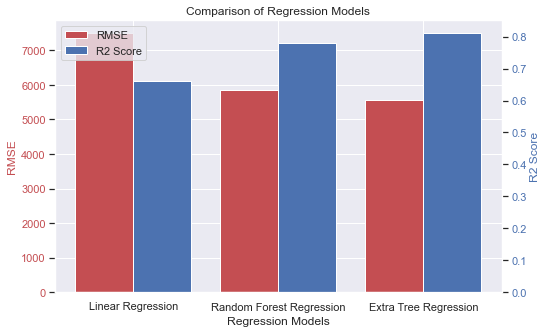

In [35]:
model_names = ['Linear Regression', 'Random Forest Regression', 'Extra Tree Regression']
rmse_scores = [7488.58, 5846.49, 5556.56]
r2_scores = [0.66, 0.78, 0.81]

x_labels = np.arange(len(model_names))

fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'r'
color2 = 'b'

# plot RMSE on primary y-axis
ax1.bar(x_labels, rmse_scores, color=color1, label='RMSE', width=0.4)
ax1.set_xlabel('Regression Models')
ax1.set_ylabel('RMSE', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# create secondary y-axis
ax2 = ax1.twinx()

# plot R2 score on secondary y-axis
ax2.bar(x_labels + 0.4, r2_scores, color=color2, label='R2 Score', width=0.4)
ax2.set_ylabel('R2 Score', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Comparison of Regression Models')
plt.xticks(x_labels + 0.2, model_names)
plt.grid(False)
plt.show()


4.3 Analysis on weather and energy price data in Melbourne based on 2021 data

In [ ]:
def analyze_weather_and_energy_price(data):
    """
    Analyze weather and energy price data in Melbourne based on data provided.

    Parameters:
    data (pandas.DataFrame): The data to analyze.

    Returns:
    None
    """

    # Print correlation coefficients between certain weather features and pricing at 9am
    print("Correlation coefficients (Pearson's method) between weather features and 9am pricing:")
    display(data[['9am PRICING','9am Temperature (°C)','9am relative humidity (%)','9am cloud amount (oktas)',
                  '9am wind direction','9am wind speed (km/h)','9am MSL pressure (hPa)']].corr(method='pearson'))
    
    # Select most important three features based on pearson correlation coefficients and make scatter plots
    
    # Plot between 9am Temperature and 9am Pricing
    plt.figure(figsize=(6,4))
    plt.title("9am Temperature (°C) v/s 9am PRICING") #title
    plt.xlabel("9am Temperature (°C)") #x label
    plt.ylabel("9am PRICING") #y label
    X_axis=data['9am Temperature (°C)']
    Y_axis=data['9am PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()
    
    # Plot between 9am relative humidity (%) and 9am Pricing
    plt.figure(figsize=(6,4))
    plt.title("9am relative humidity (%) v/s 9am PRICING") #title
    plt.xlabel("9am relative humidity (%)") #x label
    plt.ylabel("9am PRICING") #y label
    X_axis=data['9am relative humidity (%)']
    Y_axis=data['9am PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()
    
    # Plot between 9am MSL pressure (hPa) and 9am Pricing
    plt.figure(figsize=(6,4))
    plt.title("9am MSL pressure (hPa) v/s 9am PRICING") #title
    plt.xlabel("9am MSL pressure (hPa)") #x label
    plt.ylabel("9am PRICING") #y label
    X_axis=data['9am MSL pressure (hPa)']
    Y_axis=data['9am PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()
  
    # Print correlation coefficients between certain weather features and pricing at 3pm
    print("\nCorrelation coefficients (Pearson's method) between weather features and 3pm pricing:")
    display(data[['3pm PRICING','3pm Temperature (°C)','3pm relative humidity (%)','3pm cloud amount (oktas)',
                  '3pm wind direction','3pm wind speed (km/h)','3pm MSL pressure (hPa)']].corr(method='pearson'))

    # Select most important three features based on pearson correlation coefficients and make scatter plots
    
    #Plot between 3pm Temperature and 3pm Pricing
    plt.figure(figsize=(6,4))
    plt.title("3pm Temperature (°C) v/s 3pm PRICING") #title
    plt.xlabel("3pm Temperature (°C)") #x label
    plt.ylabel("3pm PRICING") #y label
    X_axis=data['3pm Temperature (°C)']
    Y_axis=data['3pm PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()

    #Plot between 3pm relative humidity (%) and 3pm Pricing
    plt.figure(figsize=(6,4))
    plt.title("3pm relative humidity (%) v/s 3pm PRICING") #title
    plt.xlabel("3pm relative humidity (%)") #x label
    plt.ylabel("3pm PRICING") #y label
    X_axis=data['3pm relative humidity (%)']
    Y_axis=data['3pm PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()

    #Plot between 3pm wind speed (km/h) and 3pm Pricing
    plt.figure(figsize=(6,4))
    plt.title("3pm wind speed (km/h) v/s 3pm PRICING") #title
    plt.xlabel("3pm wind speed (km/h)") #x label
    plt.ylabel("3pm PRICING") #y label
    X_axis=data['3pm wind speed (km/h)']
    Y_axis=data['3pm PRICING']
    plt.grid(True)
    plt.scatter(X_axis, Y_axis)
    plt.show()
    
# Call the function to analyse and visualize the data
analyze_weather_and_energy_price(data)

4.4 Analysis on current weather and energy price data in Melbourne

To do this, we get current weather and price_demand data from 1st October 2022 to 31st March 2023 from the Bureau of Meteorology and Australian Energy Market Operator (same sources as the original data). We then perform data cleaning, testing of correlation between features and data visualisation.

The current dataset provides the recommended retail energy price (RRP) so there is no need to convert the price category to integer values.

In [ ]:
# Reading two CSV files, Current_weatherdata and Current_pricedemand, using pandas
current_weather_data = pd.read_csv("Current_weatherdata.csv", skipinitialspace=True)
current_price_demand_data = pd.read_csv("Current_pricedemand.csv")

# Creating copies of the original dataframes to keep the original data intact
cwd = current_weather_data.copy()
cpdd = current_price_demand_data.copy()

# Displaying the first five rows of both dataframes
display(cwd.head())
display(cpdd.head())

In [ ]:
# Repeat the data cleaning process
# Convert 'SETTLEMENTDATE' column to datetime format
cpdd['SETTLEMENTDATE'] = pd.to_datetime(cpdd['SETTLEMENTDATE'], format='%d/%m/%Y %H:%M')

# Add a new column 'ENERGY USAGE' to cpdd DataFrame by converting 'TOTALDEMAND' to energy usage based on 5 minutes interval
cpdd['ENERGY USAGE'] = cpdd['TOTALDEMAND']*0.0833

# Drop non-required columns
cpdd_clean = cpdd.drop(columns = ['REGION', 'TOTALDEMAND','PERIODTYPE'])

# Group the data by date and calculate the maximum daily energy use and average energy pricing
grouped_cpdd = cpdd_clean.groupby(cpdd_clean['SETTLEMENTDATE'].dt.date).agg({'ENERGY USAGE': 'sum','RRP': 'mean'}).rename(columns={'ENERGY USAGE': 'MAXIMUM DAILY ENERGY USAGE'}).reset_index()

# Extract 9am and 3pm 'PRICECATEGORY' values from cpdd_clean dataset
grouped_cpdd['9am PRICING'] = cpdd.loc[(cpdd['SETTLEMENTDATE'].dt.hour == 9) & (cpdd['SETTLEMENTDATE'].dt.minute == 0), ['RRP']].reset_index(drop=True)
grouped_cpdd['3pm PRICING'] = cpdd.loc[(cpdd['SETTLEMENTDATE'].dt.hour == 15) & (cpdd['SETTLEMENTDATE'].dt.minute == 0), ['RRP']].reset_index(drop=True)

# Reset the index
new_cppd = grouped_cpdd.set_index('SETTLEMENTDATE')

# Perform linear interpolation to fill missing values, then forward fill remaining missing values
cwd.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
cwd.ffill(inplace=True)

# Convert wind direction strings to integers using predefined bins
cwd.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
           [1,2,3,4,5,6,7,8,-1,-2,-3,-4,-5,-6,-7,-8], inplace=True)

# Convert 'Calm' wind speed values to 0
cwd.replace(to_replace='Calm', value=0, inplace=True)

# Convert 'Date' column to datetime format and '9am wind speed (km/h)' and '3pm wind speed (km/h)' columns to integers
cwd['Date'] = pd.to_datetime(cwd['Date'], format = '%d/%m/%Y')
cwd['9am wind speed (km/h)'] = cwd['9am wind speed (km/h)'].astype(int)
cwd['3pm wind speed (km/h)'] = cwd['3pm wind speed (km/h)'].astype(int)

# Set 'Date' column as the index for the DataFrame
new_cwd = cwd.set_index('Date')

# Join the two DataFrames on the 'Date' column and store the result in a new variable
currentdata = new_cwd.join(new_cppd)

# Display the first few rows of the new DataFrame
display(currentdata.head())

In [ ]:
# Perform current weather and energy price analysis and compare with the current datasets

def current_analyze_weather_and_energy_price(data):
    """
    Analyze current weather and energy price data in Melbourne

    Parameters:
    data (pandas.DataFrame): The data to analyze.

    Returns:
    None
    """

    # Print correlation coefficients between certain weather features and pricing at 9am
    print("Correlation coefficients (Pearson's method) between weather features and 9am pricing:")
    display(currentdata[['9am PRICING','9am Temperature (°C)','9am relative humidity (%)','9am cloud amount (oktas)',
                  '9am wind direction','9am wind speed (km/h)','9am MSL pressure (hPa)']].corr(method='pearson'))
  
    # Print correlation coefficients between certain weather features and pricing at 3pm
    print("\nCorrelation coefficients (Pearson's method) between weather features and 3pm pricing:")
    display(currentdata[['3pm PRICING','3pm Temperature (°C)','3pm relative humidity (%)','3pm cloud amount (oktas)',
                  '3pm wind direction','3pm wind speed (km/h)','3pm MSL pressure (hPa)']].corr(method='pearson'))

# Call the function to analyse and visualize the data
current_analyze_weather_and_energy_price(currentdata)